In [9]:
# Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import sqlite3

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [10]:
# Create engine using the `spacex.sqlite` database file
engine = create_engine("sqlite:///Resources/santa_barbara_food.sqlite")

In [12]:
# Donut Chart

min_stars = 0
query = f"""
    SELECT categories, COUNT(*) as count
    FROM santa_barbara_food
    WHERE stars >= {min_stars}
    GROUP BY categories
    ORDER BY count DESC;
    """

df = pd.read_sql(text(query), con = engine)
df.head()

,categories,count
0,Mexican,1971
1,American (New),1880
2,Italian,849
3,American (Traditional),820
4,Japanese,624


C:\Users\tippi\AppData\Local\Temp\ipykernel_2960\4217342803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_df['percentage'] = (top_5_df['count'] / total_top_5) * 100


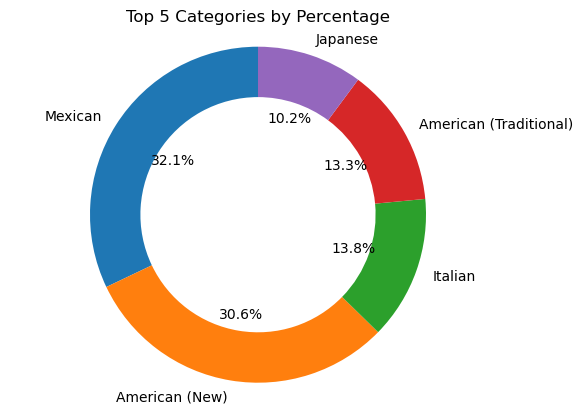

In [17]:
# Get the top 5 categories
top_5_df = df.head(5)

# Calculate the total count of the top 5 categories
total_top_5 = top_5_df['count'].sum()

# Calculate the percentages for the top 5 categories
top_5_df['percentage'] = (top_5_df['count'] / total_top_5) * 100

# Create the donut chart
fig, ax = plt.subplots()

# Plot a pie chart
wedges, texts, autotexts = ax.pie(
    top_5_df['percentage'],
    labels=top_5_df['categories'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.3)
)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Top 5 Categories by Percentage')

# Show the chart
plt.show()